In [ ]:
!nvidia-smi

Wed Mar 30 02:21:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import shutil

if os.path.exists('/content/rock_scissor_paper/'):    # 작업 디렉토리는 cats_and_dogs_filtered
    
    shutil.rmtree('/content/rock_scissor_paper/')
    print('/content/rock_scissor_paper/ is removed !!!')

In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Git/rock_paper_scissors_classification/Data/YandG.zip','r') as target_file:
    target_file.extractall('/content/rock_scissor_paper/')

In [ ]:
import os
from glob import glob

label_name_list = os.listdir('/content/rock_scissor_paper/')

print('total label nums = ', len(label_name_list))
print('==================================')
print(label_name_list)

total label nums =  3
['scissor', 'rock', 'paper']


# 작업폴더 생성

In [ ]:
import os

if not os.path.exists('/content/modeling'):
    os.mkdir('/content/modeling')
    print('Modeling dir is created !')

Modeling dir is created !


# train 폴더로 copy

In [ ]:
import shutil

src_root_dir = '/content/rock_scissor_paper/'
dst_root_dir = '/content/modeling/train'

if os.path.exists(dst_root_dir):
    shutil.rmtree(dst_root_dir)
    print(dst_root_dir + 'is deleted !')

shutil.copytree(src_root_dir, dst_root_dir)

'/content/modeling/train'

# test 폴더 생성 후 label 폴더 생성

In [ ]:
import os

label_name_list = os.listdir('/content/modeling/train/')


if not os.path.exists('/content/modeling/test/'):
    os.mkdir('/content/modeling/test/')
    print('/content/modeling/test dir is created !')
    
    count = 0

    for label_name in label_name_list:
        os.mkdir('/content/modeling/test/' + label_name)
        count += 1

    print('train label count => ', count)

/content/modeling/test dir is created !
train label count =>  3


# train 데이터에서 test 데이터로 비율만큼 이동

In [ ]:
import os
import shutil
import random
from glob import glob

ratio = 0.2

train_root_dir = '/content/modeling/train/'
test_root_dir = '/content/modeling/test/'

image_label_list = os.listdir(train_root_dir)

for label_name in image_label_list:
    
    train_image_list = glob(train_root_dir + label_name+'/*.jpg')

    print('========================================================================')
    print('total [%s] image file nums => [%s]'%(label_name, len(train_image_list)))
    
    split_num = int(ratio * len(train_image_list))

    print('split nums => ', split_num)

    test_image_list = train_image_list[0:split_num] 

    move_nums = 0

    for image_file in test_image_list:

        shutil.move(image_file, test_root_dir + label_name)
        
        move_nums += 1

    print('total move nums => ', move_nums)
    print('========================================================================')


total [scissor] image file nums => [2421]
split nums =>  484
total move nums =>  484
total [rock] image file nums => [2537]
split nums =>  507
total move nums =>  507
total [paper] image file nums => [2535]
split nums =>  507
total move nums =>  507


# 검증

In [ ]:
src_root_dir = '/content/modeling/train'
dst_root_dir = '/content/modeling/test'

train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(dst_root_dir)

train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
  print('error !')
else:
  print(len(train_label_name_list),len(test_label_name_list))

for label_name in train_label_name_list:

  train_data_nums = len(os.listdir(os.path.join(src_root_dir,label_name)))
  test_data_nums = len(os.listdir(os.path.join(dst_root_dir,label_name)))

  print('[%s] | train => [%s], test => [%s], total => [%s]'%(label_name, train_data_nums, test_data_nums,train_data_nums+test_data_nums ))
  print('========================================================')

3 3
[paper] | train => [2028], test => [507], total => [2535]
[rock] | train => [2030], test => [507], total => [2537]
[scissor] | train => [1937], test => [484], total => [2421]


# Define Hyperparameter 

In [ ]:
IMG_WIDTH = 112
IMG_HEIGHT = 112
BATCH_SIZE = 32

In [ ]:
train_dir = '/content/modeling/train'
test_dir = '/content/modeling/test'

# Image Data Generator 정의

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=10,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_data_gen.flow_from_directory(directory=train_dir,
                                  batch_size=BATCH_SIZE,
                                  color_mode='rgb',
                                  shuffle=True,
                                  target_size=(IMG_WIDTH,IMG_HEIGHT),
                                  class_mode='sparse')
test_data = test_data_gen.flow_from_directory(directory=test_dir,
                                  batch_size=BATCH_SIZE,
                                  color_mode='rgb',
                                  shuffle=True,
                                  target_size=(IMG_WIDTH,IMG_HEIGHT),
                                  class_mode='sparse')

print('==========train==========')
print(train_data.class_indices)
print(train_data.num_classes)
print(len(train_data.classes))

print('==========test==========')
print(test_data.class_indices)
print(test_data.num_classes)
print(len(test_data.classes))

Found 5995 images belonging to 3 classes.
Found 1498 images belonging to 3 classes.
==========train==========
{'paper': 0, 'rock': 1, 'scissor': 2}
3
5995
==========test==========
{'paper': 0, 'rock': 1, 'scissor': 2}
3
1498


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet, ResNet50, InceptionV3, Xception

# MobileNet

In [ ]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))
mobilenet.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 56, 56, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 56, 56, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 56, 56, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 56, 56, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 56, 56, 32) 

In [ ]:
model_mobile = Sequential()

model_mobile.add(mobilenet)
model_mobile.add(Flatten())
model_mobile.add(Dense(256, activation='relu'))
model_mobile.add(Dropout(0.25))
model_mobile.add(Dense(3, activation='softmax'))

model_mobile.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model_mobile.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 3, 3, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 5,589,187
Trainable params: 5,567,299
Non-trainable params: 21,888
_________________________________________

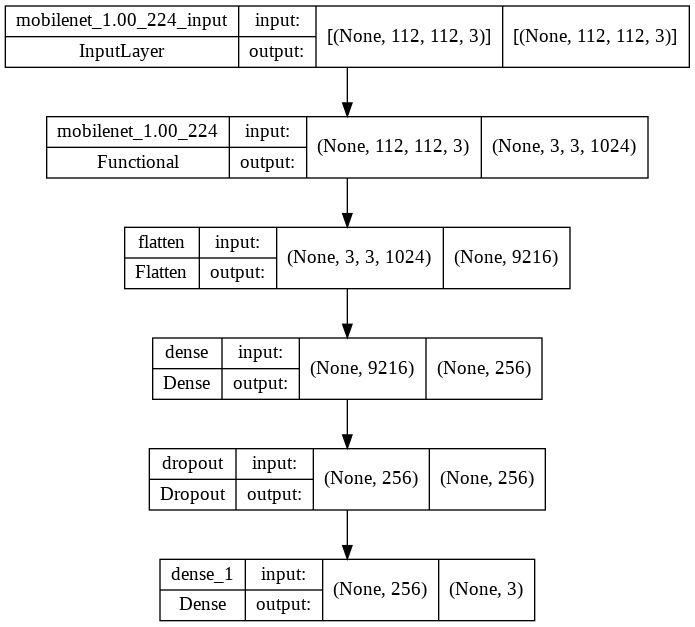

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model_mobile, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from gc import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './rps_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist_mobile = model_mobile.fit(train_data,
                 epochs=10,
                 validation_data=test_data,
                 callbacks=[checkpoint, earlystopping])

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
188/188 [==============================] - ETA: 0s - loss: 0.6946 - acc: 0.7521
Epoch 1: val_loss improved from inf to 0.15419, saving model to ./rps_MobileNet_Colab.h5
188/188 [==============================] - 49s 193ms/step - loss: 0.6946 - acc: 0.7521 - val_loss: 0.1542 - val_acc: 0.9433
Epoch 2/10
188/188 [==============================] - ETA: 0s - loss: 0.2612 - acc: 0.9004
Epoch 2: val_loss improved from 0.15419 to 0.08484, saving model to ./rps_MobileNet_Colab.h5
188/188 [==============================] - 35s 188ms/step - loss: 0.2612 - acc: 0.9004 - val_loss: 0.0848 - val_acc: 0.9740
Epoch 3/10
188/188 [==============================] - ETA: 0s - loss: 0.1738 - acc: 0.9364
Epoch 3: val_loss improved from 0.08484 to 0.05683, saving model to ./rps_MobileNet_Colab.h5
188/188 [==============================] - 35s 188ms/step - loss: 0.1738 - acc: 0.9364 - val_loss: 0.0568 - val_acc: 0.9760
Epoch 4/10
188/188 [==============================] - ETA: 0s - loss: 0.1372 - a

## Accuracy

In [ ]:
model_mobile.evaluate(test_data)

47/47 [==============================] - 3s 52ms/step - loss: 0.0106 - acc: 0.9967


[0.010608681477606297, 0.9966621994972229]

## Graph

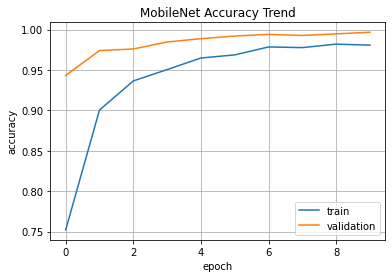

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist_mobile.history['acc'], label='train')
plt.plot(hist_mobile.history['val_acc'], label='validation')
plt.title('MobileNet Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

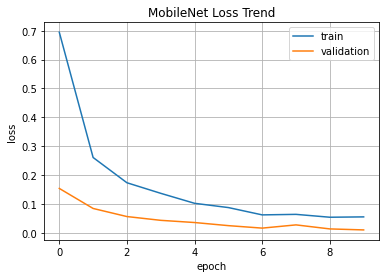

In [ ]:
plt.plot(hist_mobile.history['loss'], label='train')
plt.plot(hist_mobile.history['val_loss'], label='validation')
plt.title('MobileNet Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# model.save_weights('MobileNet_weights_Colab.h5')

# Xception


In [ ]:
xception = Xception(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))
xception.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 55, 55, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 55, 55, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                          

In [ ]:
model_xception = Sequential()

model_xception.add(xception)
model_xception.add(Flatten())
model_xception.add(Dense(256, activation='relu'))
model_xception.add(Dropout(0.25))
model_xception.add(Dense(3, activation='softmax'))

model_xception.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model_xception.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 29,251,115
Trainable params: 29,196,587
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './rps_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist_xception = model_xception.fit(train_data,
                 epochs=10,
                 validation_data=test_data)

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
188/188 [==============================] - 80s 390ms/step - loss: 0.4567 - acc: 0.8183 - val_loss: 0.1179 - val_acc: 0.9573
Epoch 2/10
188/188 [==============================] - 71s 376ms/step - loss: 0.1686 - acc: 0.9413 - val_loss: 0.0371 - val_acc: 0.9880
Epoch 3/10
188/188 [==============================] - 71s 376ms/step - loss: 0.0931 - acc: 0.9641 - val_loss: 0.0155 - val_acc: 0.9973
Epoch 4/10
188/188 [==============================] - 71s 376ms/step - loss: 0.0569 - acc: 0.9812 - val_loss: 0.0105 - val_acc: 0.9973
Epoch 5/10
188/188 [==============================] - 71s 375ms/step - loss: 0.0494 - acc: 0.9833 - val_loss: 0.0066 - val_acc: 0.9980
Epoch 6/10
188/188 [==============================] - 71s 376ms/step - loss: 0.0322 - acc: 0.9892 - val_loss: 0.0054 - val_acc: 0.9987
Epoch 7/10
188/188 [==============================] - 72s 382ms/step - loss: 0.0357 - acc: 0.9903 - val_loss: 0.0044 - val_acc: 0.9987
Epoch 8/10
188/188 [==============================] - 7

## Accuracy

In [ ]:
model_xception.evaluate(test_data)

47/47 [==============================] - 4s 93ms/step - loss: 0.0024 - acc: 0.9993


[0.0024371652398258448, 0.9993324279785156]

## Graph

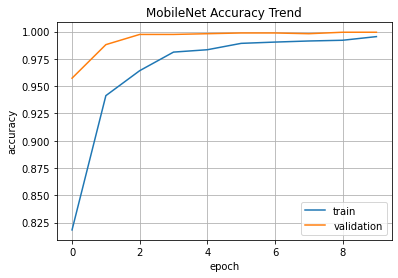

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist_xception.history['acc'], label='train')
plt.plot(hist_xception.history['val_acc'], label='validation')
plt.title('MobileNet Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

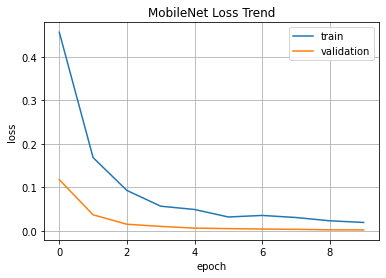

In [ ]:
plt.plot(hist_xception.history['loss'], label='train')
plt.plot(hist_xception.history['val_loss'], label='validation')
plt.title('MobileNet Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# ResNet50

In [ ]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))
resnet.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 118, 118, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 56, 56, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [ ]:
model_resnet = Sequential()

model_resnet.add(resnet)
model_resnet.add(Flatten())
model_resnet.add(Dense(256, activation='relu'))
model_resnet.add(Dropout(0.25))
model_resnet.add(Dense(3, activation='softmax'))

model_resnet.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model_resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 31,977,347
Trainable params: 31,924,227
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './rps_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist_resnet = model_resnet.fit(train_data,
                 epochs=10,
                 validation_data=test_data)

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
188/188 [==============================] - 62s 286ms/step - loss: 0.5017 - acc: 0.8113 - val_loss: 3.7754 - val_acc: 0.3438
Epoch 2/10
188/188 [==============================] - 51s 271ms/step - loss: 0.1275 - acc: 0.9545 - val_loss: 3.7302 - val_acc: 0.3238
Epoch 3/10
188/188 [==============================] - 51s 271ms/step - loss: 0.0742 - acc: 0.9738 - val_loss: 2.9203 - val_acc: 0.3658
Epoch 4/10
188/188 [==============================] - 51s 270ms/step - loss: 0.0569 - acc: 0.9788 - val_loss: 1.3058 - val_acc: 0.5801
Epoch 5/10
188/188 [==============================] - 51s 270ms/step - loss: 0.0382 - acc: 0.9872 - val_loss: 0.2144 - val_acc: 0.9332
Epoch 6/10
188/188 [==============================] - 51s 270ms/step - loss: 0.0380 - acc: 0.9880 - val_loss: 0.0138 - val_acc: 0.9960
Epoch 7/10
188/188 [==============================] - 51s 270ms/step - loss: 0.0239 - acc: 0.9928 - val_loss: 0.0050 - val_acc: 0.9980
Epoch 8/10
188/188 [==============================] - 5

## Accuracy

In [ ]:
model_resnet.evaluate(test_data)

47/47 [==============================] - 4s 84ms/step - loss: 0.0026 - acc: 0.9987


[0.002573054749518633, 0.998664915561676]

## Graph

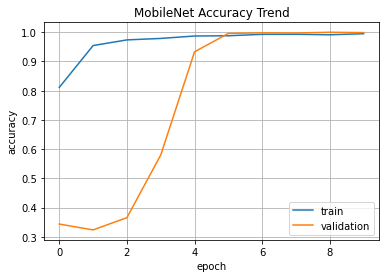

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist_resnet.history['acc'], label='train')
plt.plot(hist_resnet.history['val_acc'], label='validation')
plt.title('MobileNet Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

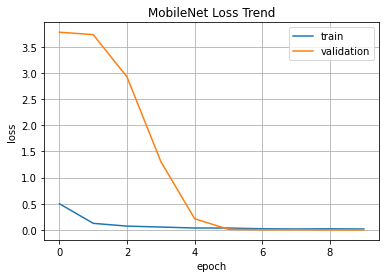

In [ ]:
plt.plot(hist_resnet.history['loss'], label='train')
plt.plot(hist_resnet.history['val_loss'], label='validation')
plt.title('MobileNet Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()